In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#modelo que se usará
def recta(x,param):
    return param[0]*x+param[1]

#Logaritmo natural del likelihood
def lnl(datos,modelo,param):
    return -1/2*np.sum(((datos[1]-modelo(datos[0],param))/datos[2])**2)

def montecarlo(datos,modelo,desvp,pold,it,maxit):
    '''
    datos: matriz que guarda los datos experimentales x, y y desviación de y
    modelo: modelo que se quiere ajustar a los datos
    desvp: desviación de distribución de la vecindad donde se buscarán nuevos puntos para iterar
    pold: primera aproximación
    it: puntos aceptados deseados
    maxit: máximo de iteraciones permitidas
    '''
    cadena=[]
    lnlold=lnl(datos,modelo,pold)
    cadena.append(np.append(pold,lnlold))
    nosus=0
    sus=0
    for i in range(maxit):
        random=np.random.randn(len(pold))
        pnew=desvp*random+pold        
        lnlnew=lnl(datos,modelo,pnew)
        if(lnlnew>lnlold or np.exp(lnlnew-lnlold)>np.random.uniform()):
            cadena.append(np.append(pnew,lnlnew))
            pold=pnew
            lnlold=lnlnew
            sus+=1
            if(sus==it):
                break
        else:
            cadena.append(np.append(pnew,lnlnew)) #si queremos sólo los puntos aceptados comentamos esta línea
            nosus+=1
    return cadena,nosus

In [114]:
#Se generan valores para x,los parámetros,y y desvy
x=np.linspace(0,10,1000)
#param=(np.random.uniform(-1,1,2))      #para genrarlos aelatoriamente entre -1 y 1
param=[15,20]
y=recta(x,param)
desvy=np.full((len(y)), 0.1)

#arreglo de datos
datos=[x,y,desvy]

#desviación de distribución de la vecindad donde se buscarán nuevos puntos para iterar
#tanto en m como en b puse 0.5
desvp=np.full((len(param)), 0.1)

#primera aproximación de parámetros
aprox=([20,15],[20,25],[10,15],[10,25],[10,20])

In [115]:
res=[]
for i in range(len(aprox)):
    res.append(montecarlo(datos,recta,desvp,aprox[i],1000,1000))

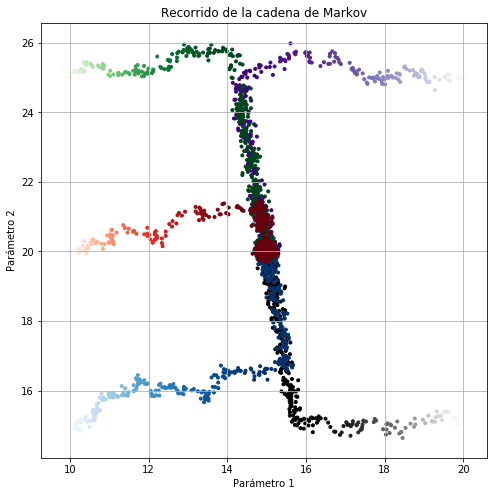

In [119]:
cmaps=['Greys','Purples', 'Blues', 'Greens', 'Reds']

fig,ax=plt.subplots(figsize=(8, 8))

for i in range(len(aprox)):
    ax.scatter(np.array(res[i][0])[:,0],np.array(res[i][0])[:,1],c=np.array(res[i][0])[:,2],cmap=cmaps[i],marker=".")

ax.set_xlabel('Parámetro 1')
ax.set_ylabel('Parámetro 2')
ax.set_title('Recorrido de la cadena de Markov') 
plt.grid()